In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("milk.csv")
X = data.iloc[:, 2:].values
y = data["labels"]

# Biến đổi phổ phản xạ thành phổ hấp thụ 
X = np.log(1.0/X)
# Đạo hàm bậc 1 phổ hấp thụ gốc và làm mượt bằng phương pháp Savitzky-Golay 
X = savgol_filter(X, 25, polyorder = 5, deriv=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)
print(X_train.shape, X_test.shape, X_val.shape)

(324, 601) (90, 601) (36, 601)


In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [4]:
accu = pd.DataFrame()
for i in range(1, 11):
    pca = PCA(i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_val_pca = pca.transform(X_val)
    k_s = []
    for k in range(3,11):
        knn = KNeighborsClassifier(k)
        knn.fit(X_train_pca, y_train)
        y_pred = knn.predict(X_val_pca)
        # print(f"k = {k}, accuracy = {accuracy_score(y_val, y_pred)}")
        k_s.append(accuracy_score(y_val, y_pred))
    accu[f"{i} PC"] = k_s
accu.index = list(range(3, 11))
print(accu)

        1 PC      2 PC      3 PC  4 PC      5 PC  6 PC      7 PC      8 PC  \
3   0.666667  1.000000  0.972222   1.0  1.000000   1.0  1.000000  0.972222   
4   0.666667  1.000000  1.000000   1.0  1.000000   1.0  1.000000  1.000000   
5   0.694444  0.972222  1.000000   1.0  0.972222   1.0  1.000000  0.972222   
6   0.666667  1.000000  1.000000   1.0  1.000000   1.0  1.000000  1.000000   
7   0.666667  1.000000  1.000000   1.0  1.000000   1.0  0.972222  0.972222   
8   0.722222  1.000000  1.000000   1.0  1.000000   1.0  0.972222  1.000000   
9   0.722222  1.000000  1.000000   1.0  1.000000   1.0  0.972222  0.972222   
10  0.722222  1.000000  1.000000   1.0  1.000000   1.0  0.972222  0.972222   

        9 PC     10 PC  
3   0.972222  0.916667  
4   0.972222  0.972222  
5   0.972222  0.972222  
6   1.000000  0.972222  
7   0.944444  0.972222  
8   1.000000  0.972222  
9   1.000000  0.916667  
10  1.000000  0.944444  


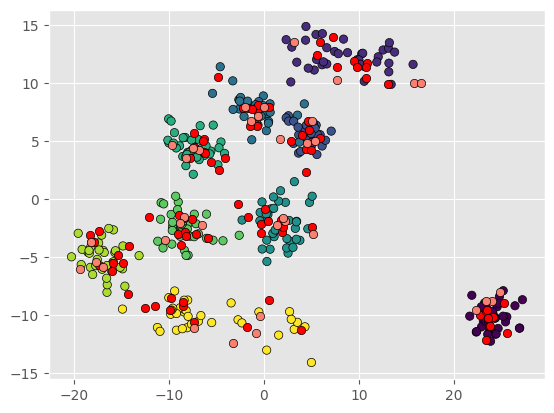

In [5]:
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

with plt.style.context(('ggplot')):
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, edgecolors='k')
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = 'r', edgecolors='k')
    plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c = 'salmon', edgecolors='k')

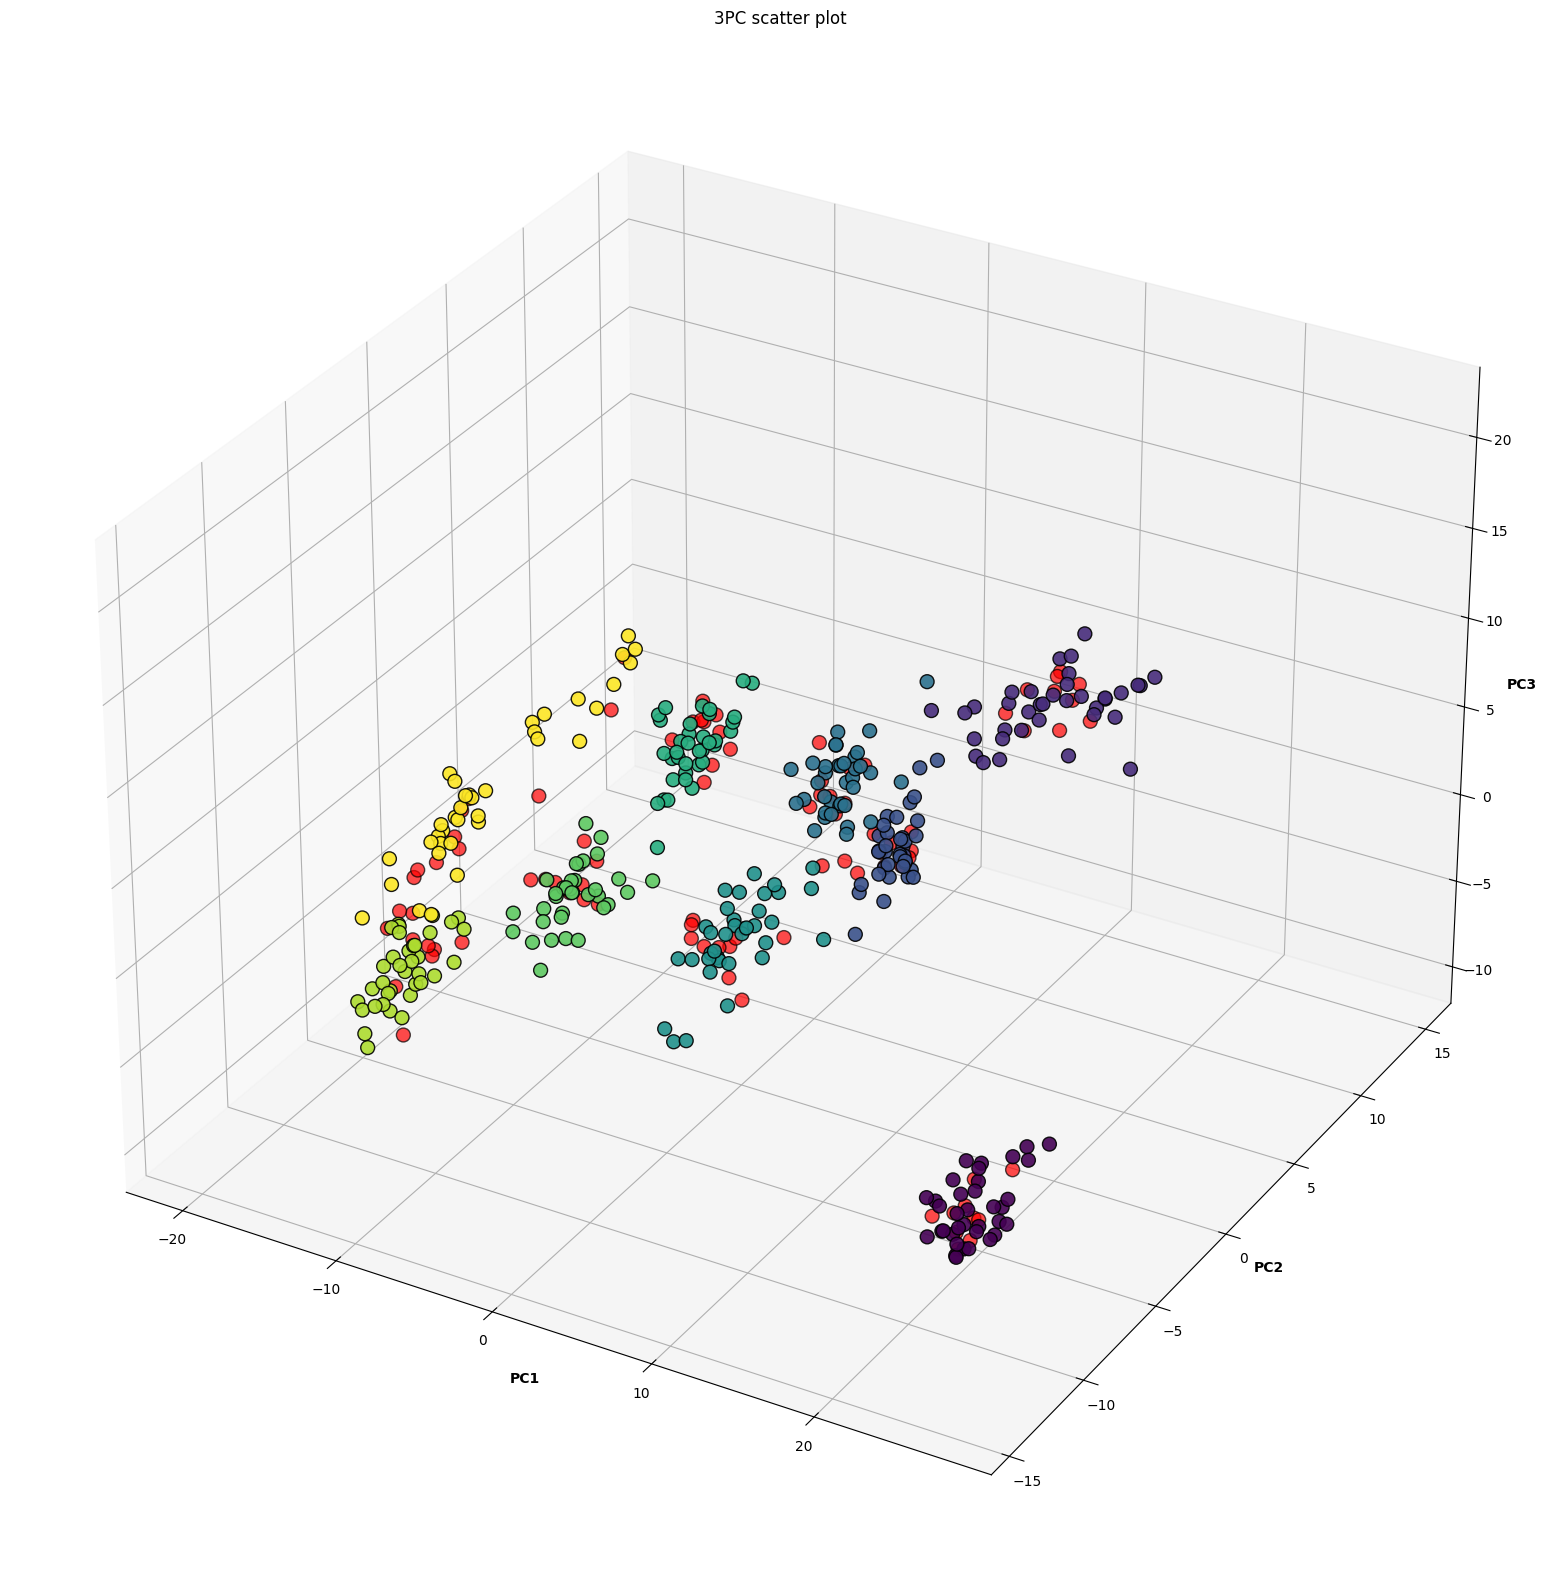

In [6]:
pca = PCA(3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)


fig = plt.figure(figsize = (20, 20))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
ax.scatter3D(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2],
                    alpha = 0.9,
                    c = y_train, 
                    edgecolors = 'k', 
                    marker ='o',
                    s=100)
ax.scatter3D(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2],
                    alpha = 0.7,
                    c = 'r', 
                    edgecolors = 'k', 
                    marker ='o',
                    s=100)
plt.title("3PC scatter plot")
ax.set_xlabel('PC1', fontweight ='bold') 
ax.set_ylabel('PC2', fontweight ='bold') 
ax.set_zlabel('PC3', fontweight ='bold')
plt.show()

In [7]:
# pca = PCA(2)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)
# X_val_pca = pca.transform(X_val)

# with plt.style.context(('ggplot')):
#     plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, edgecolors='k')
#     plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = 'r', edgecolors='k')
#     plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c = 'salmon', edgecolors='k')

accuracy = 1.0


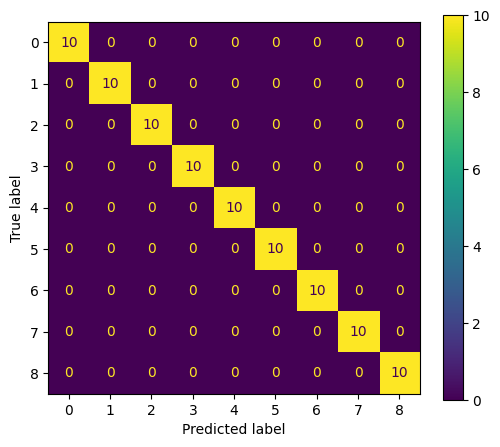

In [12]:
pca = PCA(3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(5)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
print(f"accuracy = {accuracy_score(y_test, y_pred)}")
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)
plt.show()